In [ ]:
### Linear Regration

In [ ]:
### economic groth , housing sals , scores prediction etc.

In [15]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# importing data
companies = pd.read_csv('E:/Data Sets/1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
# Observing Correlation between Columns
companies[['R&D Spend','Administration','Marketing Spend']].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


In [18]:
# removing column due to high correlation
companies.drop(['Marketing Spend'],axis=1,inplace=True)
companies

,R&D Spend,Administration,State,Profit
0,165349.20,136897.800,New York,192261.83000
1,162597.70,151377.590,California,191792.06000
2,153441.51,101145.550,Florida,191050.39000
3,144372.41,118671.850,New York,182901.99000
4,142107.34,91391.770,Florida,166187.94000
...,...,...,...,...
995,54135.00,118451.999,California,95279.96251
996,134970.00,130390.080,California,164336.60550
997,100275.47,241926.310,California,413956.48000
998,128456.23,321652.140,California,333962.19000


<AxesSubplot:>

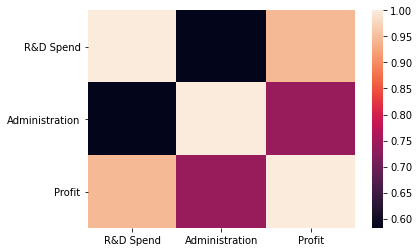

In [19]:
# data visualisation
sns.heatmap(companies.corr())

In [20]:
# Encoding categorical data
# build correlated matrix
dummies=pd.get_dummies(companies.State)
companies=pd.concat([companies,dummies],axis=1)
companies

,R&D Spend,Administration,State,Profit,California,Florida,New York
0,165349.20,136897.800,New York,192261.83000,0,0,1
1,162597.70,151377.590,California,191792.06000,1,0,0
2,153441.51,101145.550,Florida,191050.39000,0,1,0
3,144372.41,118671.850,New York,182901.99000,0,0,1
4,142107.34,91391.770,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,California,95279.96251,1,0,0
996,134970.00,130390.080,California,164336.60550,1,0,0
997,100275.47,241926.310,California,413956.48000,1,0,0
998,128456.23,321652.140,California,333962.19000,1,0,0


In [21]:
companies.drop(['State'],axis=1,inplace=True)
companies

,R&D Spend,Administration,Profit,California,Florida,New York
0,165349.20,136897.800,192261.83000,0,0,1
1,162597.70,151377.590,191792.06000,1,0,0
2,153441.51,101145.550,191050.39000,0,1,0
3,144372.41,118671.850,182901.99000,0,0,1
4,142107.34,91391.770,166187.94000,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,95279.96251,1,0,0
996,134970.00,130390.080,164336.60550,1,0,0
997,100275.47,241926.310,413956.48000,1,0,0
998,128456.23,321652.140,333962.19000,1,0,0


In [22]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
companies[['R&D Spend','Administration']]=scale.fit_transform(companies[['R&D Spend','Administration']])

In [23]:
# Specifying X and y
X = companies.iloc[:,2].values
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [24]:
# deoping profit
companies.drop(['Profit'],axis=1,inplace=True)
companies

,R&D Spend,Administration,California,Florida,New York
0,1.000000,0.316659,0,0,1
1,0.983359,0.370214,1,0,0
2,0.927985,0.184424,0,1,0
3,0.873136,0.249247,0,0,1
4,0.859438,0.148348,0,1,0
...,...,...,...,...,...
995,0.327398,0.248434,1,0,0
996,0.816272,0.292589,1,0,0
997,0.606447,0.705122,1,0,0
998,0.776878,1.000000,1,0,0


In [25]:
X = companies.iloc[:,:].values
X.shape

(1000, 5)

In [26]:
# Spliting data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

In [27]:
# traning model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [33]:
# predicting test data
pred = model.predict(X_test)

In [29]:
# coefficient and intersept
print(model.coef_)
print(model.intercept_)

[ 1.20926284e+05  2.29977190e+05  3.15407426e+02 -1.85516422e+02
 -1.29891004e+02]
-1252.5222741135804


In [35]:
# accuracy
from sklearn.metrics import r2_score
# print(accuracy_score(y_test,pred))
print(r2_score(y_test,pred))

0.9227500022763352
